In [335]:
import pandas as pd
import numpy as np
from termcolor import colored as cl # text customization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.decomposition import PCA
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from xgboost import XGBRFClassifier,XGBRegressor 
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import joblib
from scipy import stats

In [131]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Analyzing the data

In [114]:
data = pd.read_csv('dataset.csv')
(data.head(5))
# print(data.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2.0,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3.0,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4.0,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5.0,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [73]:
data.shape

(1461, 81)

In [5]:
## NA values across the data ##
data.isna().sum()

Id                 3
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1461 non-null   float64
 1   MSSubClass     1461 non-null   int64  
 2   MSZoning       1461 non-null   object 
 3   LotFrontage    1461 non-null   float64
 4   LotArea        1461 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          92 non-null     object 
 7   LotShape       1461 non-null   object 
 8   LandContour    1461 non-null   object 
 9   Utilities      1461 non-null   object 
 10  LotConfig      1461 non-null   object 
 11  LandSlope      1461 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1461 non-null   object 
 14  Condition2     1461 non-null   object 
 15  BldgType       1461 non-null   object 
 16  HouseStyle     1461 non-null   object 
 17  OverallQual    1461 non-null   int64  
 18  OverallC

In [14]:
print(cl(data.dtypes, attrs = ['bold']))
# print(cl(data.dtypes['cat'], attrs = ['bold']))

Id               float64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object


In [87]:
data[num_cols] = data[num_cols].astype('str')

In [85]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1461.000000,1202.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1453.000000,1461.000000,...,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1.461000e+03
mean,731.310014,56.872005,70.066556,10517.633812,6.101300,5.574949,1971.292266,1984.880903,103.924983,443.368925,...,94.180014,46.702259,21.939083,3.407255,15.228611,2.757016,43.459274,6.322382,2007.815195,6.391315e+09
std,421.367866,42.297099,24.281459,9977.893635,1.384604,1.112520,30.207028,20.646458,181.234352,456.059343,...,125.320121,66.252772,61.100913,29.307424,56.105476,40.163610,495.954395,2.702758,1.327812,2.121778e+11
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,3.490000e+04
25%,367.250000,20.000000,59.000000,7558.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,1.300000e+05
50%,731.500000,50.000000,69.500000,9480.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,1.635000e+05
75%,1095.750000,70.000000,80.000000,11606.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,2.145000e+05
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000030e+12


In [28]:
cols = data.columns
cat_cols = data_cat.columns
e =  list(set(cols) - set(cat_cols))

### Solution for Question - To replace all NA with blank & handle missing value for numeric column, fill up with average value; for categorical column, fill up with most-frequent value ###

In [33]:
data = data.fillna('')

In [120]:
for c in data.columns:
    if(pd.api.types.is_numeric_dtype(data[c].dtype)):
        data[c].fillna(data[c].mean(),inplace=True)
    else:
        data[c].replace("NA",np.nan, inplace=True)
        print(data[c].mode())
        data[c].fillna(data[c].mode()[0],inplace=True)

0    RL
dtype: object
0    Pave
dtype: object
0    Grvl
dtype: object
0    Reg
dtype: object
0    Lvl
dtype: object
0    AllPub
dtype: object
0    Inside
dtype: object
0    Gtl
dtype: object
0    NAmes
dtype: object
0    Norm
dtype: object
0    Norm
dtype: object
0    1Fam
dtype: object
0    1Story
dtype: object
0    Gable
dtype: object
0    CompShg
dtype: object
0    VinylSd
dtype: object
0    VinylSd
dtype: object
0    None
dtype: object
0    TA
dtype: object
0    TA
dtype: object
0    PConc
dtype: object
0    TA
dtype: object
0    TA
dtype: object
0    No
dtype: object
0    Unf
dtype: object
0    Unf
dtype: object
0    GasA
dtype: object
0    Ex
dtype: object
0    Y
dtype: object
0    SBrkr
dtype: object
0    TA
dtype: object
0    Typ
dtype: object
0    Gd
dtype: object
0    Attchd
dtype: object
0    Unf
dtype: object
0    TA
dtype: object
0    TA
dtype: object
0    Y
dtype: object
0    Gd
dtype: object
0    MnPrv
dtype: object
0    Shed
dtype: object
0    WD
dtype: object
0    Norm

In [121]:
for  c in data.columns:
    if(pd.api.types.is_numeric_dtype(data[c].dtype)):
        print("num",c,len(data[data[c].isna()]))
    else:
        pass
        print("non num",c,len(data[data[c].isna()]))

num Id 0
num MSSubClass 0
non num MSZoning 0
num LotFrontage 0
num LotArea 0
non num Street 0
non num Alley 0
non num LotShape 0
non num LandContour 0
non num Utilities 0
non num LotConfig 0
non num LandSlope 0
non num Neighborhood 0
non num Condition1 0
non num Condition2 0
non num BldgType 0
non num HouseStyle 0
num OverallQual 0
num OverallCond 0
num YearBuilt 0
num YearRemodAdd 0
non num RoofStyle 0
non num RoofMatl 0
non num Exterior1st 0
non num Exterior2nd 0
non num MasVnrType 0
num MasVnrArea 0
non num ExterQual 0
non num ExterCond 0
non num Foundation 0
non num BsmtQual 0
non num BsmtCond 0
non num BsmtExposure 0
non num BsmtFinType1 0
num BsmtFinSF1 0
non num BsmtFinType2 0
num BsmtFinSF2 0
num BsmtUnfSF 0
num TotalBsmtSF 0
non num Heating 0
non num HeatingQC 0
non num CentralAir 0
non num Electrical 0
num 1stFlrSF 0
num 2ndFlrSF 0
num LowQualFinSF 0
num GrLivArea 0
num BsmtFullBath 0
num BsmtHalfBath 0
num FullBath 0
num HalfBath 0
num BedroomAbvGr 0
num KitchenAbvGr 0
non n

### Solution for Question - To remove duplicated rows and keep only row with latest [YearBuilt] ###

In [69]:
#sort based on latest year built
data_new = data.sort_values('YearBuilt').drop_duplicates('Id',keep='last')

In [78]:
# data_new['LotFrontage'] = data_new['LotFrontage'].astype('str')
# data_new['LotArea'] = data_new['LotArea'].astype('str')

### Solution for Question - To check one [LotArea] is having multiple [LotFrontage]: if yes keep row with largest [LotFrontage] for that [LotArea] only ###

In [79]:
# To check one [LotArea] is having multiple [LotFrontage]: if yes keep row with largest [LotFrontage] for that [LotArea] only
data_new = data_new.sort_values('LotFrontage', ascending=False).drop_duplicates('LotArea').sort_index()

In [90]:
data_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,3.0,60,MSZoning,68.0,11250,Pave,,IR1,Lvl,AllPub,...,0,,,,0,9,2008,WD,Normal,223500.0
3,4.0,70,MSZoning,60.0,9550,Pave,,IR1,Lvl,AllPub,...,0,,,,0,2,2006,WD,Abnorml,140000.0
4,5.0,60,MSZoning,84.0,14260,Pave,,IR1,Lvl,AllPub,...,0,,,,0,12,2008,WD,Normal,250000.0
10,11.0,20,MSZoning,70.0,11200,Pave,,Reg,Lvl,AllPub,...,0,,,,0,2,2008,WD,Normal,129500.0
11,12.0,60,MSZoning,85.0,11924,Pave,,IR1,Lvl,AllPub,...,0,,,,0,7,2006,New,Partial,345000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456.0,60,MSZoning,62.0,7917,Pave,,Reg,Lvl,AllPub,...,0,,,,0,8,2007,WD,Normal,175000.0
1457,1457.0,20,MSZoning,85.0,13175,Pave,,Reg,Lvl,AllPub,...,0,,MnPrv,,0,2,2010,WD,Normal,210000.0
1458,1458.0,70,MSZoning,66.0,9042,Pave,,Reg,Lvl,AllPub,...,0,,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1459,1459.0,20,MSZoning,68.0,9717,Pave,,Reg,Lvl,AllPub,...,0,,,,0,4,2010,WD,Normal,142125.0


In [80]:
data_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,3.0,60,MSZoning,68.0,11250,Pave,,IR1,Lvl,AllPub,...,0,,,,0,9,2008,WD,Normal,223500.0
3,4.0,70,MSZoning,60.0,9550,Pave,,IR1,Lvl,AllPub,...,0,,,,0,2,2006,WD,Abnorml,140000.0
4,5.0,60,MSZoning,84.0,14260,Pave,,IR1,Lvl,AllPub,...,0,,,,0,12,2008,WD,Normal,250000.0
10,11.0,20,MSZoning,70.0,11200,Pave,,Reg,Lvl,AllPub,...,0,,,,0,2,2008,WD,Normal,129500.0
11,12.0,60,MSZoning,85.0,11924,Pave,,IR1,Lvl,AllPub,...,0,,,,0,7,2006,New,Partial,345000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456.0,60,MSZoning,62.0,7917,Pave,,Reg,Lvl,AllPub,...,0,,,,0,8,2007,WD,Normal,175000.0
1457,1457.0,20,MSZoning,85.0,13175,Pave,,Reg,Lvl,AllPub,...,0,,MnPrv,,0,2,2010,WD,Normal,210000.0
1458,1458.0,70,MSZoning,66.0,9042,Pave,,Reg,Lvl,AllPub,...,0,,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1459,1459.0,20,MSZoning,68.0,9717,Pave,,Reg,Lvl,AllPub,...,0,,,,0,4,2010,WD,Normal,142125.0


In [204]:
# data.columns

In [124]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500.0
1,2.0,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500.0
2,3.0,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500.0
3,4.0,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000.0
4,5.0,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456.0,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000.0
1457,1457.0,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000.0
1458,1458.0,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1459,1459.0,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125.0


In [67]:
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [64]:
for columns in cat_cols:
#     data[columns] = data[columns].apply(lambda x: (x.value_counts(), index[0]))
        new_df = pd.DataFrame(data[columns].astype('str').value_counts())

In [66]:
type(new_df)

pandas.core.frame.DataFrame

In [142]:
labels = clf.fit_predict(x.drop(columns='Id'))

In [143]:
np.unique(labels,return_counts=True)

(array([-1,  1]), array([   8, 1453], dtype=int64))

In [144]:
data['Outlier_Flag'] = labels

In [145]:
data[data['Outlier_Flag']==-1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Outlier_Flag
88,89.000,50,C (all),105.000,8470,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,10,2009,ConLD,Abnorml,85000.000,-1
185,186.000,75,RM,90.000,22950,Pave,Grvl,IR2,Lvl,AllPub,...,Gd,GdPrv,Shed,0,6,2006,WD,Normal,475000.000,-1
488,489.000,190,RL,60.000,10800,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,5,2006,ConLD,Normal,160000.000,-1
636,636.000,190,RH,60.000,10896,Pave,Pave,Reg,Bnk,AllPub,...,Gd,MnPrv,Shed,0,3,2007,WD,Abnorml,200000.000,-1
637,637.000,30,RM,51.000,6120,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,1,2009,ConLw,Normal,60000.000,-1
829,829.000,60,RL,70.067,28698,Pave,Grvl,IR2,Low,AllPub,...,Gd,MnPrv,Shed,0,6,2009,WD,Abnorml,185000.000,-1
1299,1299.000,60,RL,313.000,63887,Pave,Grvl,IR3,Bnk,AllPub,...,Gd,MnPrv,Shed,0,1,2008,New,Partial,160000.000,-1
1388,1388.000,50,RM,60.000,8520,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,GdWo,Shed,0,8,2007,CWD,Family,136000.000,-1


In [168]:
numeric_columns = data.select_dtypes(include=np.number)

In [169]:
len(numeric_columns)

1461

In [167]:
data.drop(columns=["Outlier_Flag"],inplace=True)

In [174]:
numeric_columns.drop(columns=["Id"],inplace=True)

C:\Users\ganad\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [180]:
# df = pd.DataFrame(np.random.randn(100, 3))

non_outlier_data = data[(np.abs(stats.zscore(numeric_columns)) <5).all(axis=1)]

In [181]:
non_outlier_data[(non_outlier_data["MSSubClass"]==190) & (non_outlier_data["YrSold"]==2010)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
704,704.000,190,RM,76.000,7630,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2010,WD,Normal,140000.000
862,862.000,190,RL,75.000,11625,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,131500.000
1417,1417.000,190,RM,60.000,11340,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,122500.000


### Solution for Question - To Check if [SalePrice] is trending upwards over the years [YrSold] for the same [MSSubClass]: for those not, display the [MSSubClass] value and indicate the year [YrSold] when [SalePrice] trend is reversed

In [183]:
subclass_grp = non_outlier_data.groupby(['MSSubClass','YrSold']).agg({'SalePrice':np.mean}).reset_index()

In [188]:
subclass_grp["fall"] = subclass_grp.SalePrice.lt(subclass_grp.SalePrice.shift())

In [201]:
subclass_grp[subclass_grp["fall"]==True][["MSSubClass","YrSold"]].drop_duplicates(["MSSubClass"],keep='first')

,MSSubClass,YrSold
1,20,2007
5,30,2006
11,40,2008
14,45,2006
21,50,2009
24,60,2007
28,70,2006
33,75,2006
37,80,2006
42,85,2006


In [203]:
non_outlier_data.to_csv('Cleaneddata.csv')

In [46]:
df_clean

Id                       
MSSubClass             20
MSZoning               RL
LotFrontage              
LotArea              7200
                   ...   
MoSold                  6
YrSold               2009
SaleType               WD
SaleCondition      Normal
SalePrice        140000.0
Length: 81, dtype: object

In [ ]:
transform(lambda x: x.fillna(x.mode()[0]

In [26]:
data_cat  = data.select_dtypes(include=['object']).copy()

In [27]:
data_cat = list(set(cols) - set(num_cols))

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1459,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [206]:
non_outlier_data.dtypes

Id               float64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [211]:
processed_df = pd.get_dummies(non_outlier_data)

In [221]:
non_outlier_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.000,60,RL,65.000,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500.000
1,2.000,20,RL,80.000,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500.000
2,3.000,60,RL,68.000,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500.000
3,4.000,70,RL,60.000,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000.000
4,5.000,60,RL,84.000,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1454.000,20,RL,90.000,17217,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,7,2006,WD,Abnorml,84500.000
1455,1455.000,20,FV,62.000,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,10,2009,WD,Normal,185000.000
1456,1456.000,60,RL,62.000,7917,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000.000
1457,1457.000,20,RL,85.000,13175,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000.000


In [281]:
final_data = non_outlier_data.drop('Id', axis =1)

In [282]:
final_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500.00
1,20,RL,80.00,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500.00
2,60,RL,68.00,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500.00
3,70,RL,60.00,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000.00
4,60,RL,84.00,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,RL,90.00,17217,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,7,2006,WD,Abnorml,84500.00
1455,20,FV,62.00,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,10,2009,WD,Normal,185000.00
1456,60,RL,62.00,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000.00
1457,20,RL,85.00,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000.00


In [288]:
# final_data

## Modelling approach 

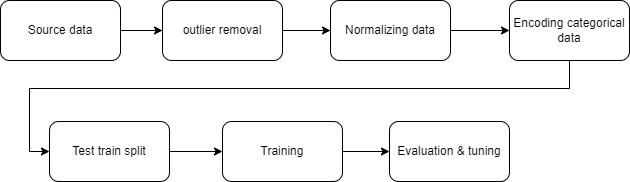

In [289]:
## Data Transformation is done using Standardscaler ##
# df = processed_df.copy()
X = final_data.drop('SalePrice', axis=1)
y = final_data['SalePrice']


In [374]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [358]:
final_model_data = pd.get_dummies(X)

In [359]:
list(final_model_data.columns.values)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotShape_a',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_

#### Scaling the data with different scalers for Input, Output

In [360]:
x = final_model_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled, columns=final_model_data.columns)

In [363]:
min_max_scaler_y = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler_y.fit_transform(y.values.reshape(-1, 1))

#### Storing the Scaler of X,Y and the model as Joblibs  ##

In [362]:
joblib.dump(min_max_scaler,"x_scaler.joblib")

['x_scaler.joblib']

In [364]:
joblib.dump(min_max_scaler_y,"y_scaler.joblib")

['y_scaler.joblib']

#### Train - Test Split

In [365]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.20, random_state=42, shuffle=True)

#### Modelling

In [366]:
r_clf = XGBRegressor(n_estimators=50, random_state=28)
r_clf.fit(X_train, y_train)
y_pred=r_clf.predict(X_test)

# print("Non Encoded RF")
# # print(classification_report(y_test, y_pred))
# print("Accuracy Score:",accuracy_score(y_test, y_pred))
# print("ROC AUC Score:",roc_auc_score(y_test, y_pred))

In [367]:
joblib.dump(r_clf,"model.joblib")

['model.joblib']

In [368]:
# y_pred = r_clf.predict(X_test)

#### Model Evaluation

In [369]:
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [[0.0000967 ]
 [0.00069541]
 [0.00034   ]
 [0.00014355]
 [0.0001757 ]]
y_pred = [0.00033115 0.00062679 0.00039443 0.0002872  0.00032398]


In [268]:
# r_clf = XGBRegressor(n_estimators=50, random_state=28)
# r_clf.fit(X_train_scaled, y_train)
# y_pred=r_clf.predict(X_test_scaled)

In [372]:
print(f'mean_squared_error = {mean_squared_error(y_actual, y_predicted)}')

mean_squared_error = 1300590574.2624767


In [373]:
mean_absolute_percentage_error(y_actual, y_predicted)

0.15377968661472866

In [370]:
y_actual = min_max_scaler_y.inverse_transform(y_test)

In [371]:
y_predicted = min_max_scaler_y.inverse_transform(y_pred.reshape(-1, 1))

In [321]:
y_test.shape

(274, 1)

In [305]:
print(f'y_true = {np.array(y_actual)[:5]}')
print(f'y_pred = {y_predicted[:5]}')

y_true = [[   20.            60.          8281.         ...     0.
      1.             0.        ]
 [  120.            34.          5001.         ...     0.
      1.             0.        ]
 [   60.            70.06655574 13517.         ...     0.
      1.             0.        ]
 [  180.            21.          1491.         ...     0.
      1.             0.        ]
 [  190.            60.          6780.         ...     0.
      1.             0.        ]]
y_pred = [[   20.005444      59.986412    8213.962      ...     0.00000282
      0.99998814     0.00000878]
 [  119.99517       34.01434     4792.093      ...     0.00000282
      0.99998814     0.00000878]
 [   59.997665      70.06857    13568.392      ...     0.00000282
      0.99998814     0.00000878]
 [  179.9902        21.05492     1490.793      ...     0.00000282
      0.99998814     0.00000878]
 [  189.96478       60.000214    6730.8203     ...     0.00000282
      0.99998814     0.00000878]]


In [331]:
arr1inds = np.squeeze(y_actual,-1).argsort()
sorted_arr1 =  np.squeeze(y_actual,-1)[arr1inds[::-1]]
sorted_arr2 =  np.squeeze(y_predicted,-1)[arr1inds[::-1]]

In [333]:
sorted_arr1,sorted_arr2

(array([538000., 465000., 402861., 378500., 377426., 341000., 333168.,
        324000., 320000., 319900., 318000., 316600., 315000., 315000.,
        310000., 305000., 295000., 293077., 290000., 284000., 283463.,
        276000., 270000., 266500., 265000., 264561., 264132., 262500.,
        261500., 260000., 260000., 258000., 256000., 255900., 255000.,
        250580., 250000., 248900., 248000., 245350., 240000., 240000.,
        240000., 239000., 236500., 236500., 235000., 234000., 233000.,
        232600., 232000., 232000., 231500., 230000., 230000., 226000.,
        225000., 224900., 224500., 220000., 219500., 219500., 219500.,
        219210., 216000., 215200., 215000., 214000., 213000., 210000.,
        210000., 209500., 206900., 206000., 205000., 204750., 202500.,
        201000., 200624., 200500., 200141., 200000., 197900., 197000.,
        197000., 194500., 193500., 192500., 192140., 192000., 192000.,
        190000., 190000., 188700., 188000., 187100., 186500., 186000.,
      

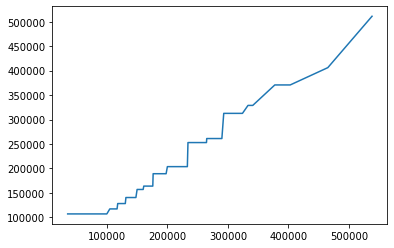

In [334]:
plt.plot(sorted_arr1,sorted_arr2)

### Future work

### 

1. To understand the data better by getting the data dictionary/summary.
2. Can see the Feature importance to use only selected features.
3. Try out different modelling techniques after data understanding to get a better model.
